In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/Machine_Learning

/content/drive/MyDrive/Machine_Learning


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
#Load required libraries

#libraries required for statistics
import scipy.stats
import scipy.stats as stat
import pylab 

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
%matplotlib inline

#model building libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#metrics libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [46]:
df_data = pd.read_csv("diabetes.csv")

Feature Description:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [47]:
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Text(0.5, 0, 'Outcome')

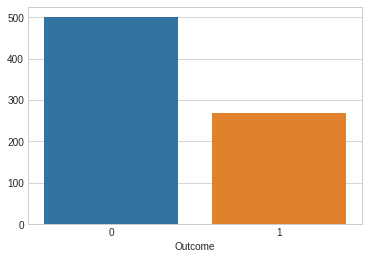

In [50]:
#distribution of values in target feature
sns.barplot(x=df_data['Outcome'].value_counts().index, y=df_data['Outcome'].value_counts().values, data=df_data)
plt.xlabel('Outcome')

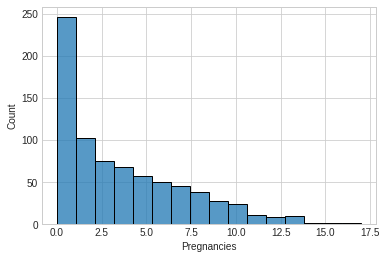

In [51]:
sns.histplot(data=df_data, x='Pregnancies')

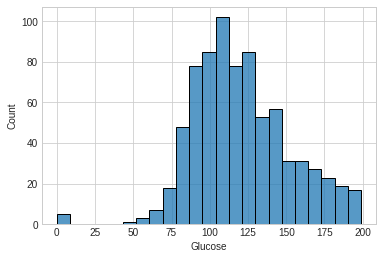

In [52]:
sns.histplot(data=df_data, x='Glucose')

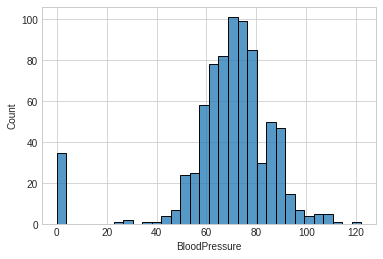

In [53]:
sns.histplot(data=df_data, x='BloodPressure')

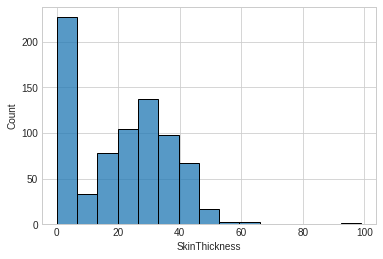

In [54]:
sns.histplot(data=df_data, x='SkinThickness')

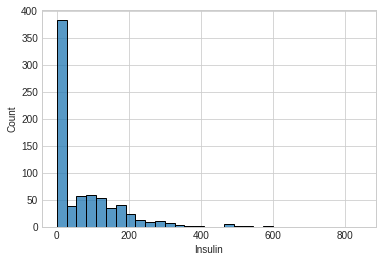

In [55]:
sns.histplot(data=df_data, x='Insulin')

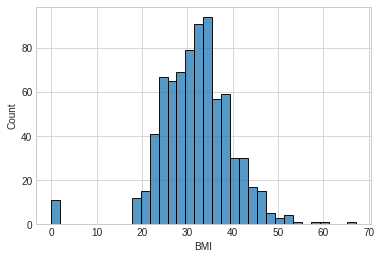

In [56]:
sns.histplot(data=df_data, x='BMI')

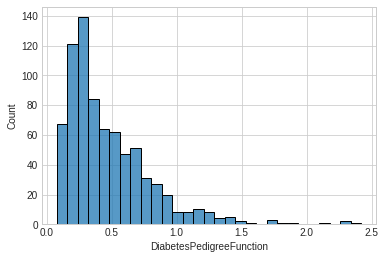

In [57]:
sns.histplot(data=df_data, x='DiabetesPedigreeFunction')

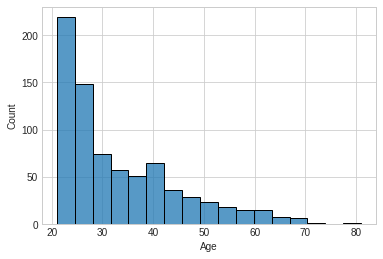

In [58]:
sns.histplot(data=df_data, x='Age')

Observation:

There are no categorical features

Features like Pregnancies, SkinThickness, Insulin, 

DiabetesPedigreeFunction and Age are right-skewed

There are few outliers

In [59]:
#Functon to get count of missing values in each column
def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]

In [60]:
print(get_cols_with_missing_values(df_data))

Series([], dtype: int64)


In [61]:
# No Missing Value

In [63]:
# Check Outliers
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Observation:

Features like Glucose, BloodPressure, SkinThickness, Insulin, BMI have 0 as a value
This must be an invalid reading as a living human being cannot have such a low value for these features

In [64]:
print("Total 0 value outliers in Glucose: ", df_data[df_data.Glucose == 0].shape[0])
print("Total 0 value outliers in BloodPressure: ", df_data[df_data.BloodPressure == 0].shape[0])
print("Total 0 value outliers in Insulin: ", df_data[df_data.Insulin == 0].shape[0])
print("Total 0 value outliers in SkinThickness: ", df_data[df_data.SkinThickness == 0].shape[0])
print("Total 0 value outliers in BMI: ", df_data[df_data.BMI == 0].shape[0])


Total 0 value outliers in Glucose:  5
Total 0 value outliers in BloodPressure:  35
Total 0 value outliers in Insulin:  374
Total 0 value outliers in SkinThickness:  227
Total 0 value outliers in BMI:  11


In [65]:
df_data2= df_data[(df_data.BloodPressure!=0)&(df_data.Glucose!=0)&(df_data.BMI!=0)]
df_data2.drop(['SkinThickness'],axis=1,inplace=True)
df_data2.shape

(724, 8)

In [66]:
# Feature Transformation
numerical_cols = [cname for cname in df_data2.columns if cname!='Outcome']
skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_data2[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Pregnancies,0.903173,0.903173,True
1,Glucose,0.526024,0.526024,True
2,BloodPressure,0.137344,0.137344,False
3,Insulin,2.196314,2.196314,True
4,BMI,0.596946,0.596946,True
5,DiabetesPedigreeFunction,1.917550,1.917550,True
6,Age,1.086270,1.086270,True


In [67]:
df_data2.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
#Apply log1p transformation because Pregnancies and Insulin feature as have a 0 value. 
'''for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column] = np.log1p(df_data2[column])'''

'for column in skew_df.query("Skewed == True")[\'Feature\'].values:\n    df_data2[column] = np.log1p(df_data2[column])'

In [69]:
#QQ plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()


In [70]:
# Log Transformation
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_log'] = np.log1p(df_data2[column])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc54ed42a90>,
      dtype=object)

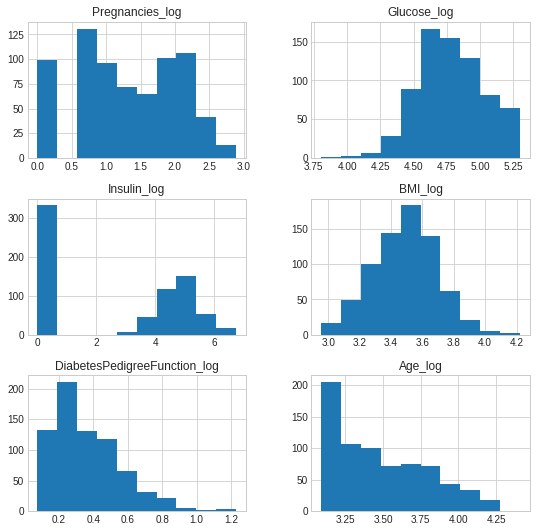

In [71]:
df_data_log=df_data2[['Pregnancies_log', 'Glucose_log', 'Insulin_log', 'BMI_log', 'DiabetesPedigreeFunction_log', 'Age_log']]
df_data_log.hist(figsize=(9, 9))

In [72]:
# Reciprocal Transformation
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_rec']=1/(df_data2[column]+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc54edcc850>,
      dtype=object)

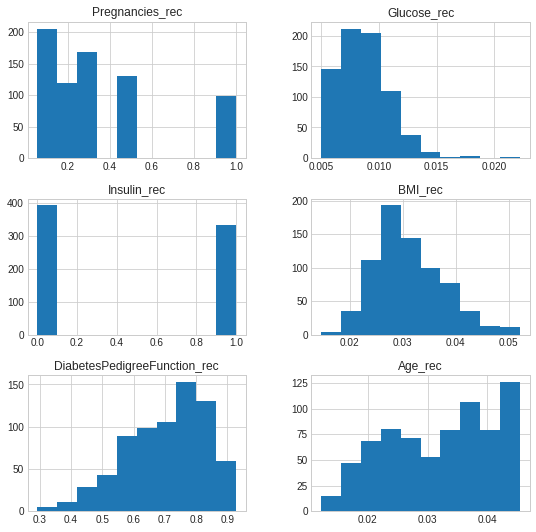

In [73]:
df_data_rec=df_data2[['Pregnancies_rec', 'Glucose_rec', 'Insulin_rec', 'BMI_rec', 'DiabetesPedigreeFunction_rec', 'Age_rec']]
df_data_rec.hist(figsize=(9, 9))


In [74]:
#  Square root transformation
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_square']=df_data2[column]**(1/2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc542639d50>,
      dtype=object)

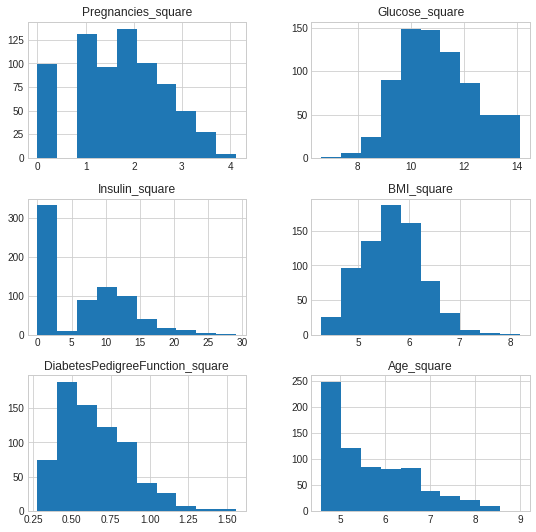

In [75]:
df_data_square=df_data2[['Pregnancies_square', 'Glucose_square', 'Insulin_square', 'BMI_square', 'DiabetesPedigreeFunction_square', 'Age_square']]
df_data_square.hist(figsize=(9, 9))

In [76]:
# Exponential transformation
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_exp']=df_data2[column]**(1/1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5423cc510>,
      dtype=object)

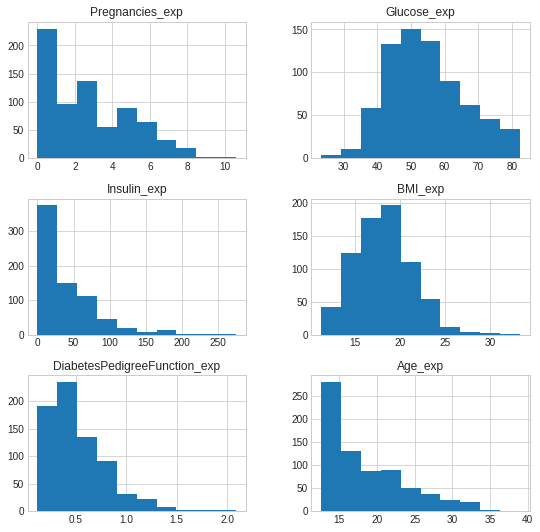

In [77]:
df_data_exp=df_data2[['Pregnancies_exp', 'Glucose_exp', 'Insulin_exp', 'BMI_exp', 'DiabetesPedigreeFunction_exp', 'Age_exp']]
df_data_exp.hist(figsize=(9, 9))


In [78]:
# BoxCox transformation
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_data2[column+'_boxcox'],parameters= stat.boxcox(df_data2[column]+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc542143650>,
      dtype=object)

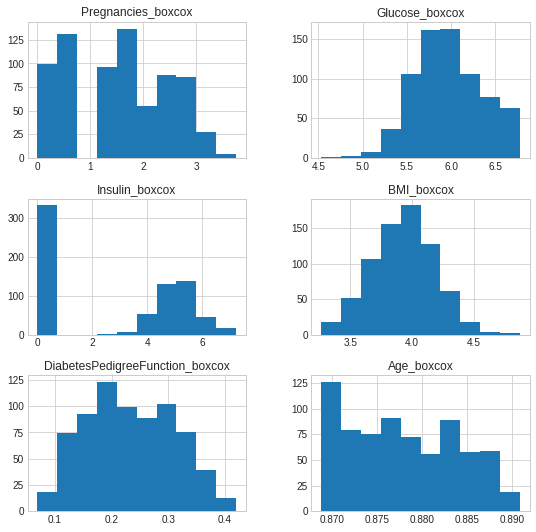

In [79]:
df_data_boxcox=df_data2[['Pregnancies_boxcox', 'Glucose_boxcox', 'Insulin_boxcox', 'BMI_boxcox', 'DiabetesPedigreeFunction_boxcox', 'Age_boxcox']]
df_data_boxcox.hist(figsize=(9, 9))

In [80]:
df_data_transf=df_data2[['Pregnancies_exp', 'Glucose_exp', 'Insulin_square', 'BMI_log', 'DiabetesPedigreeFunction_boxcox', 'Age_log', 'Outcome']]

In [81]:
#seperate dependent 'y' and independent 'X' features
X = df_data_transf.loc[:, df_data_transf.columns!='Outcome']
y = df_data_transf['Outcome']

In [82]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (506, 6) (506,)
Test (218, 6) (218,)


In [83]:
classifier=XGBClassifier()

In [84]:
classifier.fit(X_train, y_train)

XGBClassifier()

In [85]:
y_pred=classifier.predict(X_valid)

In [86]:
print('Model accuracy score: ',accuracy_score(y_valid,y_pred))

Model accuracy score:  0.7706422018348624


In [87]:
print(confusion_matrix(y_valid, y_pred))

[[117  27]
 [ 23  51]]


In [88]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       144
           1       0.65      0.69      0.67        74

    accuracy                           0.77       218
   macro avg       0.74      0.75      0.75       218
weighted avg       0.77      0.77      0.77       218



In [89]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)
y_pred_2=model_rf.predict(X_valid)

In [90]:
print('Model accuracy score: ',accuracy_score(y_valid,y_pred_2))

Model accuracy score:  0.7614678899082569


In [91]:
print(confusion_matrix(y_valid, y_pred_2))

[[116  28]
 [ 24  50]]


In [92]:
print(classification_report(y_valid, y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       144
           1       0.64      0.68      0.66        74

    accuracy                           0.76       218
   macro avg       0.73      0.74      0.74       218
weighted avg       0.76      0.76      0.76       218



The accuracy score of RandomForest classifier > XGBoost classifier.
So we will try hyperparameter tuning on RandomForest classifier model

In [93]:
# Hyper-parameter tuning

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
#Hyper parameter optimization parameter grid
params={
    "n_estimators": [50,100,150,200,400,500],
    "criterion": ['gini', 'entropy', 'log_loss']
}

In [96]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10)


In [97]:
model_rf = RandomForestClassifier(random_state=0)
grid_search =  GridSearchCV(estimator=model_rf, param_grid=params, cv=kfold, n_jobs=-1,verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 150, 200, 400, 500]})

In [98]:
best_grid = grid_search.best_estimator_
print(best_grid)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=0)


In [99]:
y_pred = best_grid.predict(X_valid)


In [100]:
print('Model accuracy score: ',accuracy_score(y_valid,y_pred))
print('Confusion matrix: ')
print(confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred))


Model accuracy score:  0.7752293577981652
Confusion matrix: 
[[117  27]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       144
           1       0.66      0.70      0.68        74

    accuracy                           0.78       218
   macro avg       0.75      0.76      0.75       218
weighted avg       0.78      0.78      0.78       218

